# Correlating NYC Wetbulb Temperature and NYC Electricty Use

### In today's class, we will look into the correlation between NYC Electricity and NYC Wetbulb Temperature.  The NYC Electricity data was taken from the NYISO database, and Twb is taken from the JFK weather station.

#### Load the data into python

In [4]:
import numpy as np
import datetime as dt

electricity = np.loadtxt('../data/NYC_electricity.txt',delimiter =',')
Twb = np.loadtxt('../data/NYC_Twb.txt',delimiter = ',')

#### Examine the data

In [5]:
print 'The dimensions of the electricity data are {0}'.format(electricity.shape)
print 'The dimensions of the Twb data are {0}'.format(Twb.shape)

The dimensions of the electricity data are (4383, 27)
The dimensions of the Twb data are (4383, 27)


Notice there are 4383 days in the dataset, but what are the columns?

In [6]:
print '{0},{1},{2}'.format(electricity[0,0],electricity[0,1],electricity[0,2])

2002.0,1.0,1.0


So, the first three columns are year, month, day, and the next 24 columns are the electricity load at each hour, for a given day. 

## Plot the data

Since our data is [year, month, day, hour1,...,hour24] we will need to introduce a new type of plot.  Instead of plotting a line, we will plot a filled contour plot, where the x-axis is hour, and the y-axis is day of year.  But first, we'll want to be able to plot the correct dates along the y-axis.  In order to do so, we'll need to make an array of the dates.

In [7]:
import matplotlib.dates as dates
import datetime as dt
dateList = dates.num2date(dates.drange(dt.datetime(2002,1,1),dt.datetime(2013,12,31),dt.timedelta(1)))
dateStrings = [n.strftime('%Y-%m-%d') for n in dateList]

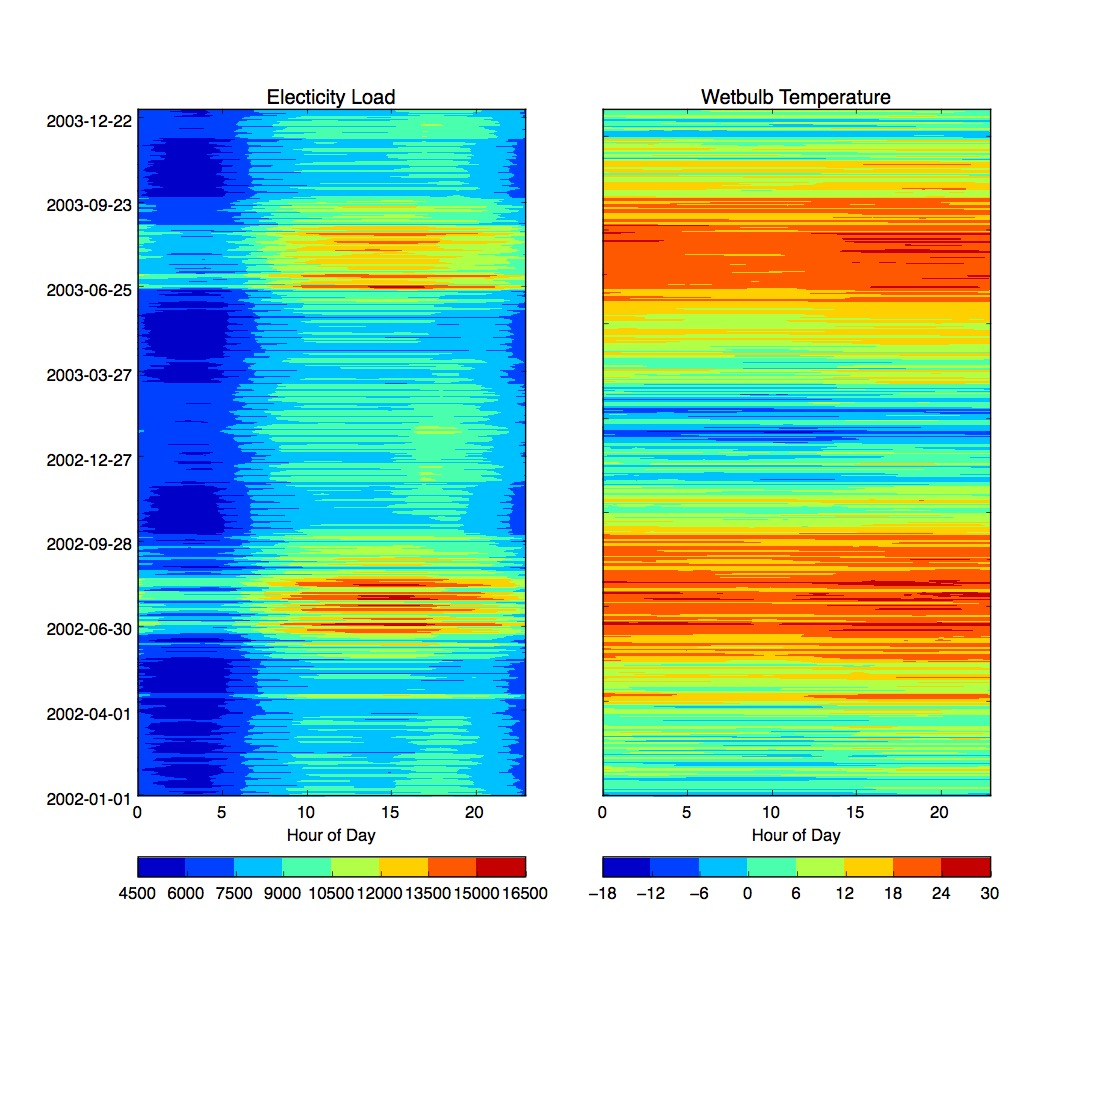

In [23]:
import matplotlib.pyplot as plt
plt.figure(figsize = (11,11))
plt.subplot(121)
plt.contourf(electricity[0:365*2,3:])
plt.colorbar(orientation = 'horizontal',pad = 0.07)
plt.title('Electicity Load')
labels = dateStrings[0:365*2:90]
plt.yticks(np.arange(0,365*2 + 1,90),labels)
plt.xlabel('Hour of Day')
plt.subplot(122)
plt.contourf(Twb[0:365*2,3:])
cbar = plt.colorbar(orientation = 'horizontal',pad = 0.07)
plt.title('Wetbulb Temperature')
labels = dateStrings[0:365*2:90]
plt.xlabel('Hour of Day')
plt.tick_params(axis = 'y',labelleft = 'off')
plt.savefig('../figures/sample_elect_Twb.jpg')
plt.close()

import IPython.display as disp
I = disp.Image('../figures/sample_elect_Twb.jpg')
disp.display(I)

##Question:

How do you think these data are correlated?  How does the correlation differ for the summer and winter?  Use the intereactive plot from the next section to test your hypothesis!


In [ ]:
from matplotlib.widgets import CheckButtons

def date_range(start,end):
    """ Given a start date and end date (must be datetime.datetime(yyyy,mm,dd)
    this function will retun a dictionary with keys year,month,day
    
    start: datetime.date(yyyy,mm,dd)
    end  : datetime.date(yyyy,mm,dd)
    """
    
    dateList = {}
    r = (end+dt.timedelta(days=1)-start).days
    dateList['month'] = np.array([(start + dt.timedelta(days=i)).month for i in xrange(r)])
    dateList['day'] = np.array([(start + dt.timedelta(days=i)).day for i in xrange(r)])
    dateList['year'] = np.array([(start + dt.timedelta(days=i)).year for i in xrange(r)])
    dateList['doy'] = np.array([(start + dt.timedelta(days=i)).timetuple().tm_yday for i in xrange(r)])
    return dateList

def findSeason(start,end,season):
    """ Given a start and end date (must be datetime) a 1-D array season
    where each element corresponds to a month included in a season, this function
    will return the index values that should be included in the calculation. The largest
    month number should always be listed last (list months in increasing order).
    
    start  : datetime.date(yyyy,mm,dd)
    end    : datetime.date(yyyy,mm,dd)
    season : [1,2,12]
    """
    
    indices = []                               
    dateList = date_range(start,end)
    for x in xrange(np.shape(season)[0]):
        if x is 0:
            temp = np.nonzero(dateList['month'] == season[x])
        else:
            temp1 = np.nonzero(dateList['month'] == season[x])
            temp = np.concatenate((temp,temp1),axis = 1)
    return temp
# Apply the functions to get the index values of each season
Idjf = findSeason(dt.datetime(2002,1,1),dt.datetime(2013,12,31),[1,2,12])
Imam = findSeason(dt.datetime(2002,1,1),dt.datetime(2013,12,31),[3,4,5])
Ijja = findSeason(dt.datetime(2002,1,1),dt.datetime(2013,12,31),[6,7,8])
Ison = findSeason(dt.datetime(2002,1,1),dt.datetime(2013,12,31),[9,10,11])

correlations = np.zeros((4,24))
for n in xrange(3,27):
    corr = np.corrcoef(np.squeeze(electricity[Idjf[0],n].T),np.squeeze(Twb[Idjf[0],n].T))
    correlations[0,n-3] = corr[0,1]
    
    corr = np.corrcoef(np.squeeze(electricity[Imam[0],n].T),np.squeeze(Twb[Imam[0],n].T))
    correlations[1,n-3] = corr[0,1]
    
    corr = np.corrcoef(np.squeeze(electricity[Ijja[0],n].T),np.squeeze(Twb[Ijja[0],n].T))
    correlations[2,n-3] = corr[0,1]
    
    corr = np.corrcoef(np.squeeze(electricity[Ison[0],n].T),np.squeeze(Twb[Ison[0],n].T))
    correlations[3,n-3] = corr[0,1]
    
fig, ax = plt.subplots()
fig.subplots_adjust(left = 0.2)
lines = plt.plot(correlations.T, lw = 2, visible = False)
plt.title('Correlation of Twb and Electricity for Different Seasons')
plt.xlabel('Hour of Day')

# Build buttons
rax = plt.axes([0.02, 0.4, 0.13, 0.2], aspect = 'equal')
labels = ('DJF','MAM','JJA','OND')
Check = CheckButtons(rax,labels,(False, False, False, False))
def func(label):
    i = labels.index(label)
    lines[i].set_visible(not lines[i].get_visible())
    fig.canvas.draw()
Check.on_clicked(func)
plt.show()
